In [2]:
import pandas as pd
import numpy as np
import collections
import requests
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = pd.read_csv("/home/vikmachine/diffsydiw.csv")
file2 = pd.read_csv("/home/vikmachine/sym_t.csv")
file3 = pd.read_csv("/home/vikmachine/dia_t.csv")
f1=pd.DataFrame(file)
f2=pd.DataFrame(file2)
f3=pd.DataFrame(file3)

f3['did']=f3['did'].astype(int)

In [4]:
file2
#f1.merge(f3, left_on='did', right_on='diagnose').reindex(columns=['syd', 'diagnose', 'wei'])
f1['syd'] = f1['syd'].replace(f2.set_index('syd')['symptom'])
f1['did'] = f1['did'].replace(f3.set_index('did')['diagnose'])
#f1

In [5]:
from io import StringIO
train, val, test = np.split(f1.sample(frac=1), [int(.3*len(f1)), int(.9*len(f1))])
#f1['syd'].unique()
#col = ['syd', 'did']
#f1=f1[col]
f1.dropna()

,syd,did,wei
0,Upper abdominal pain,Cholecystitis inflammation of the gallbladder,2.0
1,Upper abdominal pain,Choledocholithiasis stone in bile duct,2.0
2,Upper abdominal pain,Cholelithiasis gallstones,1.0
3,Upper abdominal pain,Constipation,2.0
4,Upper abdominal pain,Gastric ulcer stomach ulcer,2.0
5,Upper abdominal pain,Gastritis stomach inflammation,1.0
6,Upper abdominal pain,Gastroenteritis intestinal infection,2.0
7,Upper abdominal pain,"Gastroesophageal reflux GERD, heartburn",2.0
8,Upper abdominal pain,Hiatal hernia stomach pushes through diaphragm,1.0
9,Upper abdominal pain,"Irritable bowel syndrome IBS, chronic intestin...",1.0


In [6]:
from matplotlib.pyplot import figure
f1.dropna()
abc=f1.loc[f1['wei'] <= 1.0]
g=abc
c=abc
g=g.groupby('syd')['syd']

g=g.count()#g strictly gives us count of syd
a=abc.sort_values('syd',ascending=True)
xd=a
a = a.drop_duplicates(subset='syd', keep='first')
a=a.dropna()
xyz=g
g=pd.DataFrame(g)
g.columns = ['count']
g['syd'] = g.index
g.index=(range(len(g)))
g.reset_index
a.reset_index

a.reset_index(level=0, inplace=True)
a=a.drop(columns=['index'])

#g
#print(g.clumns.values)
d=pd.merge(a, g,  how='left', left_on=['syd'], right_on = ['syd'])
x=d.count
d = d[d['count']>0]
ss=d
xd
xd.dropna()
xd=xd.groupby('syd', as_index=False).wei.mean()
xd.rename(index=str, columns={"wei": "average"})
xd.rename(columns={'wei':'average'}, inplace=True)
d=pd.merge(d, xd,  how='left', left_on=['syd'], right_on = ['syd'])
d

,syd,did,wei,count,average
0,Abdominal swelling (Stomach swelling),Bacterial overgrowth of small intestine Bacter...,0.0,22,0.681818
1,Abscess (Collection of pus),Spinal abscess collection of spinal pus,1.0,9,0.666667
2,Agitated,Hyperthyroidism elevated thyroid hormone,0.0,17,0.470588
3,Alcohol abuse,Marijuana use,0.0,10,0.800000
4,Amenorrhea (No menstruation),Obesity,1.0,8,0.500000
5,Anger,Post-traumatic stress disorder PTSD,1.0,10,0.700000
6,Ankle pain,Spondylolisthesis slipped back bone,0.0,10,0.600000
7,Anxiety (Nervousness),Drug overuse Prescription Drug Overuse,1.0,23,0.434783
8,Arm ache or pain,Tennis elbow lateral epicondylitis,0.0,50,0.240000
9,Arm itching,Lymphoma lymph node cancer,0.0,13,0.153846


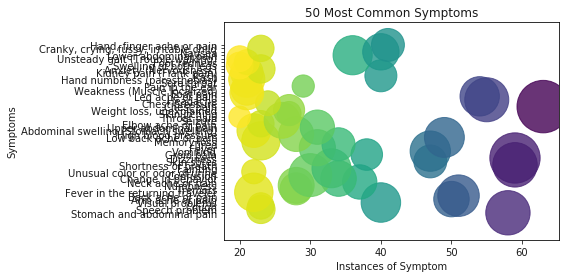

In [7]:
d=d.sort_values('count',ascending=False)
extra=d
d=d.head(50)
d=d.sample(frac=1)
d1=d['count'].tolist()
d2=d['syd'].tolist()
s1=ss['count'].tolist()
s2=ss['syd'].tolist()
#len(d2)
plt.yticks(range(len(d2)),d2)#,rotation=90)
plt.ylabel('Symptoms')
plt.xlabel('Instances of Symptom')

plt.title('50 Most Common Symptoms')


#fig_size[0] = 30
#fig_size[1] = 5
#plt.rcParams["figure.figsize"] = fig_size
sns.set(rc={'figure.figsize':(5,19)})
plt.scatter(d1,range(len(d1)),s=((d['average']+2)**4)*(d['count']),c=d1,cmap='viridis_r',alpha=0.8)

sns.set_style("whitegrid", {'axes.grid' : False})
#pl,range(len(d))t.savefig('figure.png', bbox_inches = "tight")
plt.savefig('figure.png', bbox_inches = "tight",transparent=True)

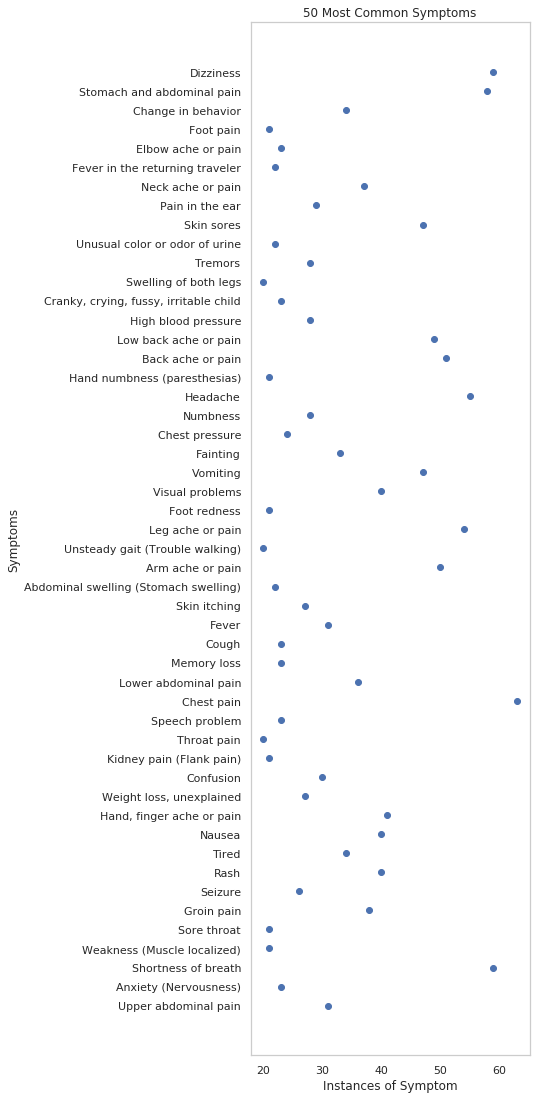

In [8]:
d=d.sort_values('count',ascending=False)
extra=d
d=d.head(50)
d=d.sample(frac=1)
d1=d['count'].tolist()
d2=d['syd'].tolist()
s1=ss['count'].tolist()
s2=ss['syd'].tolist()#d[d['syd'].str.contains("pain", na=False)]

plt.yticks(range(len(d2)),d2)#,rotation=90)
plt.ylabel('Symptoms')
plt.xlabel('Instances of Symptom')
plt.title('50 Most Common Symptoms')

#fig_size[0] = 30
#fig_size[1] = 5
#plt.rcParams["figure.figsize"] = fig_size
#sns.set(rc={'figure.figsize':(5,19)})
plt.scatter(d1,range(len(d1)))#,s=((d['average']+2)**4)*(d['count']),c=d1,cmap='viridis_r',alpha=0.8)
#pl,range(len(d))t.savefig('figure.png', bbox_inches = "tight")
#sns_plot.savefig("output.png")
#d[d['syd'].str.contains("pain", na=False)]
plt.show()

[[40.66666667  0.3591562 ]
 [21.78947368  0.48121192]
 [55.33333333  0.41578018]
 [29.69230769  0.47807988]]


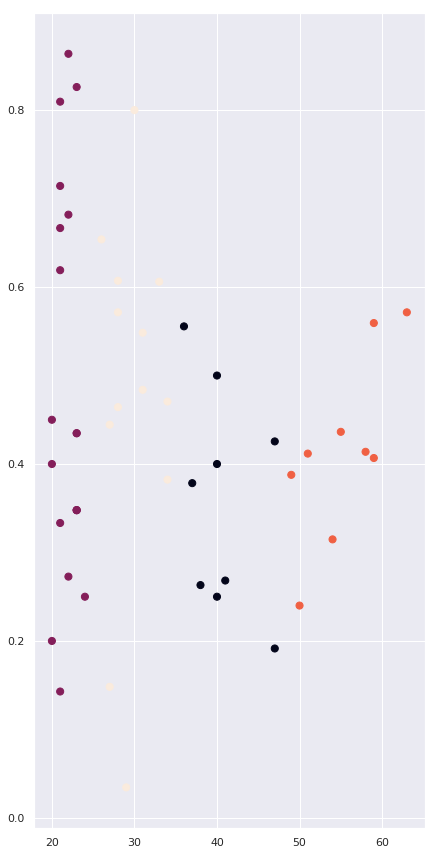

In [9]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

extra=extra.sample(frac=1)
ex = DataFrame(extra,columns=['count','average'])
symptoms = DataFrame(extra,columns=['syd'])
ex3=symptoms['syd'].tolist()

kmeans = KMeans(n_clusters=4).fit(ex)
centroids = kmeans.cluster_centers_
print(centroids)
ex1=ex['count'].tolist()
ex2=ex['average'].tolist()

sns.set(rc={'figure.figsize':(7,15)})
#plt.yticks(ex1,d.syd,rotation=90)
plt.scatter(ex1, ex2, c= kmeans.labels_.astype(float), s=50, alpha=1)
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

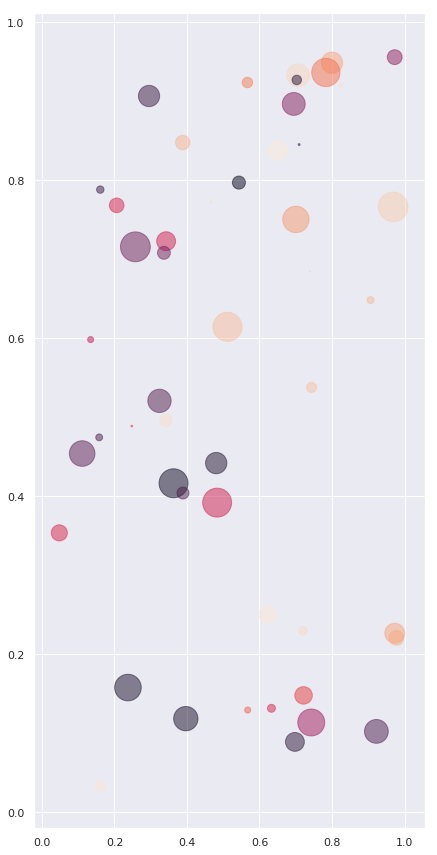

In [10]:
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()